### Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

### Load Dataset

In [39]:
df = pd.read_csv('../Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Dataset Overview

In [40]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


# 1) EDA

### Check for Duplicates

In [41]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Check for Missing Values

In [42]:
# Kiểm tra các cột có giá trị null
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


### Handle Missing Values

In [43]:
# Xử lý missing values nếu có
df = df.dropna()  # hoặc dùng fillna nếu cần


In [44]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


# 2) Reprocessing data

### Map Sleep Duration to Numeric Values

In [45]:
# Mapping thời lượng ngủ thành số
sleep_map = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)

# Kiểm tra và xử lý NaN
if df['Sleep Duration'].isnull().sum() > 0:
    print("Found NaN in 'Sleep Duration' after mapping.")
    df['Sleep Duration'].fillna(df['Sleep Duration'].mean(), inplace=True)  # Hoặc dùng phương pháp khác

Found NaN in 'Sleep Duration' after mapping.


C:\Users\Baomi\AppData\Local\Temp\ipykernel_6928\1761936172.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Duration'].fillna(df['Sleep Duration'].mean(), inplace=True)  # Hoặc dùng phương pháp khác


### Drop Unnecessary Columns

In [46]:
df = df.drop(columns=['id', 'City', 'Profession'])

### Identify Categorical Columns

In [47]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Gender', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


### Split Dataset into Train, Validation, and Test Sets

In [48]:
# Bước 1: Chia dữ liệu thành train (70%) và tạm thời (30%)
train_set, temp_set = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Depression'])

# Bước 2: Chia phần tạm thời (30%) thành validation (15%) và test (15%)
valid_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42, stratify=temp_set['Depression'])

# Bước 3: Lưu ra file CSV
train_set.to_csv('../train_set.csv', index=False)
valid_set.to_csv('../valid_set.csv', index=False)
test_set.to_csv('../test_set.csv', index=False)

print(f"Train set: {train_set.shape}")
print(f"Validation set: {valid_set.shape}")
print(f"Test set: {test_set.shape}")


Train set: (19528, 15)
Validation set: (4185, 15)
Test set: (4185, 15)


### Reload Train, Validation, and Test Sets

In [49]:
train_df = pd.read_csv('../train_set.csv')
valid_df = pd.read_csv('../valid_set.csv')
test_df = pd.read_csv('../test_set.csv')


### Split Features and Labels

In [50]:
X_train = train_df.drop(columns=['Depression'])
y_train = train_df['Depression']

X_valid = valid_df.drop(columns=['Depression'])
y_valid = valid_df['Depression']

X_test = test_df.drop(columns=['Depression'])
y_test = test_df['Depression']


### Check for Missing Values in Splits

In [51]:
print(train_df.isnull().sum())
print(valid_df.isnull().sum())
print(test_df.isnull().sum())


Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           

### One-Hot Encode Categorical Columns

In [52]:
# 2. One-hot encode cho các cột dạng object
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_valid_encoded = pd.get_dummies(X_valid, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [53]:
yes_no_columns = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
# One-hot encode các cột yes_no_columns
df_encoded = pd.get_dummies(df, columns=yes_no_columns, drop_first=True)

In [54]:
# Các cột số cần chuẩn hóa
columns_to_scale = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                    'Study Satisfaction', 'Job Satisfaction',
                    'Work/Study Hours', 'Financial Stress', 'Sleep Duration']

# Khởi tạo và fit scaler với tập train
scaler = MinMaxScaler()
X_train_encoded[columns_to_scale] = scaler.fit_transform(X_train_encoded[columns_to_scale])
X_valid_encoded[columns_to_scale] = scaler.transform(X_valid_encoded[columns_to_scale])
X_test_encoded[columns_to_scale] = scaler.transform(X_test_encoded[columns_to_scale])


### Align Columns Across Splits

In [55]:
# 3. Căn chỉnh cột giữa các tập
X_valid_encoded = X_valid_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [56]:
print("X_train_encoded:")
display(X_train_encoded.head())

print("\nX_valid_encoded:")
display(X_valid_encoded.head())

print("\nX_test_encoded:")
display(X_test_encoded.head())


X_train_encoded:


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.243902,0.8,0.0,0.828,0.8,0.0,0.7,0.833333,0.00,False,...,False,False,False,False,False,False,False,False,True,True
1,0.024390,1.0,0.0,0.709,1.0,0.0,0.3,0.916667,1.00,False,...,False,False,False,False,False,False,False,False,True,True
2,0.097561,0.6,0.0,0.665,0.2,0.0,1.0,0.166667,0.75,False,...,False,True,False,False,False,False,False,False,True,False
3,1.000000,0.2,0.0,0.814,0.2,0.0,0.3,0.833333,0.75,True,...,False,False,False,False,False,False,False,True,True,True
4,0.365854,0.6,0.0,0.647,0.2,0.0,0.0,0.833333,0.00,False,...,False,False,False,False,False,False,False,False,False,True



X_valid_encoded:


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.170732,1.0,0.0,0.587,0.8,0.0,0.0,0.750000,0.25,False,...,False,True,False,False,False,False,False,False,True,False
1,0.097561,0.6,0.0,0.725,1.0,0.0,0.7,0.250000,0.25,True,...,False,False,False,False,False,False,False,False,True,False
2,0.146341,0.4,0.0,0.954,0.4,0.0,0.3,0.833333,0.50,True,...,False,False,False,False,False,False,False,False,False,False
3,0.390244,0.8,0.0,0.804,0.4,0.0,0.7,1.000000,0.75,True,...,False,False,False,False,False,False,False,False,True,True
4,0.317073,1.0,0.0,0.921,0.8,0.0,0.0,0.500000,0.50,True,...,False,False,False,False,False,False,False,False,True,True



X_test_encoded:


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.146341,0.8,0.0,0.993,0.4,0.0,0.7,0.500000,1.00,False,...,False,False,False,False,False,False,False,False,True,False
1,0.341463,0.4,0.0,0.791,0.8,0.0,1.0,1.000000,0.25,False,...,False,False,False,False,False,False,False,False,True,True
2,0.000000,0.8,0.0,0.960,1.0,0.0,0.0,0.500000,0.00,False,...,False,False,False,False,False,False,False,False,False,False
3,0.121951,0.6,0.0,0.556,0.8,0.0,0.3,0.833333,0.75,False,...,False,False,False,False,False,False,False,False,True,True
4,0.097561,0.6,0.0,0.895,0.2,0.0,0.0,0.833333,0.75,False,...,False,False,False,False,False,False,False,False,True,False


In [57]:
X_train_encoded.info()
X_valid_encoded.info()
X_test_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19528 entries, 0 to 19527
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        19528 non-null  float64
 1   Academic Pressure                          19528 non-null  float64
 2   Work Pressure                              19528 non-null  float64
 3   CGPA                                       19528 non-null  float64
 4   Study Satisfaction                         19528 non-null  float64
 5   Job Satisfaction                           19528 non-null  float64
 6   Sleep Duration                             19528 non-null  float64
 7   Work/Study Hours                           19528 non-null  float64
 8   Financial Stress                           19528 non-null  float64
 9   Gender_Male                                19528 non-null  bool   
 10  Dietary Habits_Moderat

In [58]:
# Chuyển đổi các cột categorical thành số
for col in categorical_columns:
    if col in X_train_encoded.columns:
        X_train_encoded[col] = X_train_encoded[col].astype('category').cat.codes
    if col in X_valid_encoded.columns:
        X_valid_encoded[col] = X_valid_encoded[col].astype('category').cat.codes
    if col in X_test_encoded.columns:
        X_test_encoded[col] = X_test_encoded[col].astype('category').cat.codes

In [59]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_valid_scaled = scaler.transform(X_valid_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [60]:
print("Data after one-hot encoding (Training Set):")
display(X_train_encoded.head())

print("\nData after one-hot encoding (Validation Set):")
display(X_valid_encoded.head())

print("\nData after one-hot encoding (Test Set):")
display(X_test_encoded.head())

Data after one-hot encoding (Training Set):


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.243902,0.8,0.0,0.828,0.8,0.0,0.7,0.833333,0.00,False,...,False,False,False,False,False,False,False,False,True,True
1,0.024390,1.0,0.0,0.709,1.0,0.0,0.3,0.916667,1.00,False,...,False,False,False,False,False,False,False,False,True,True
2,0.097561,0.6,0.0,0.665,0.2,0.0,1.0,0.166667,0.75,False,...,False,True,False,False,False,False,False,False,True,False
3,1.000000,0.2,0.0,0.814,0.2,0.0,0.3,0.833333,0.75,True,...,False,False,False,False,False,False,False,True,True,True
4,0.365854,0.6,0.0,0.647,0.2,0.0,0.0,0.833333,0.00,False,...,False,False,False,False,False,False,False,False,False,True



Data after one-hot encoding (Validation Set):


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.170732,1.0,0.0,0.587,0.8,0.0,0.0,0.750000,0.25,False,...,False,True,False,False,False,False,False,False,True,False
1,0.097561,0.6,0.0,0.725,1.0,0.0,0.7,0.250000,0.25,True,...,False,False,False,False,False,False,False,False,True,False
2,0.146341,0.4,0.0,0.954,0.4,0.0,0.3,0.833333,0.50,True,...,False,False,False,False,False,False,False,False,False,False
3,0.390244,0.8,0.0,0.804,0.4,0.0,0.7,1.000000,0.75,True,...,False,False,False,False,False,False,False,False,True,True
4,0.317073,1.0,0.0,0.921,0.8,0.0,0.0,0.500000,0.50,True,...,False,False,False,False,False,False,False,False,True,True



Data after one-hot encoding (Test Set):


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0.146341,0.8,0.0,0.993,0.4,0.0,0.7,0.500000,1.00,False,...,False,False,False,False,False,False,False,False,True,False
1,0.341463,0.4,0.0,0.791,0.8,0.0,1.0,1.000000,0.25,False,...,False,False,False,False,False,False,False,False,True,True
2,0.000000,0.8,0.0,0.960,1.0,0.0,0.0,0.500000,0.00,False,...,False,False,False,False,False,False,False,False,False,False
3,0.121951,0.6,0.0,0.556,0.8,0.0,0.3,0.833333,0.75,False,...,False,False,False,False,False,False,False,False,True,True
4,0.097561,0.6,0.0,0.895,0.2,0.0,0.0,0.833333,0.75,False,...,False,False,False,False,False,False,False,False,True,False


In [61]:
X_train_encoded = X_train_encoded.rename(columns={'Have you ever had suicidal thoughts ?_Yes': 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness_Yes': 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?_No': 'Have you ever had suicidal thoughts ?', 'Gender_Male': 'Gender'})
X_valid_encoded= X_valid_encoded.rename(columns={'Have you ever had suicidal thoughts ?_Yes': 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness_Yes': 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?_No': 'Have you ever had suicidal thoughts ?', 'Gender_Male': 'Gender'})
X_test_encoded = X_test_encoded.rename(columns={'Have you ever had suicidal thoughts ?_Yes': 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness_Yes': 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?_No': 'Have you ever had suicidal thoughts ?', 'Gender_Male': 'Gender'})

# 3) Feature engineering

                                  Feature  Importance
40  Have you ever had suicidal thoughts ?    0.199574
1                       Academic Pressure    0.165756
8                        Financial Stress    0.102999
3                                    CGPA    0.091203
0                                     Age    0.085234
7                        Work/Study Hours    0.078098
4                      Study Satisfaction    0.048289
6                          Sleep Duration    0.036877
12               Dietary Habits_Unhealthy    0.024132
9                                  Gender    0.018322
41       Family History of Mental Illness    0.016552
10                Dietary Habits_Moderate    0.013861
23                        Degree_Class 12    0.010720
19                             Degree_BCA    0.006521
14                            Degree_B.Ed    0.006058
37                             Degree_MSc    0.005817
13                           Degree_B.Com    0.005783
22                          

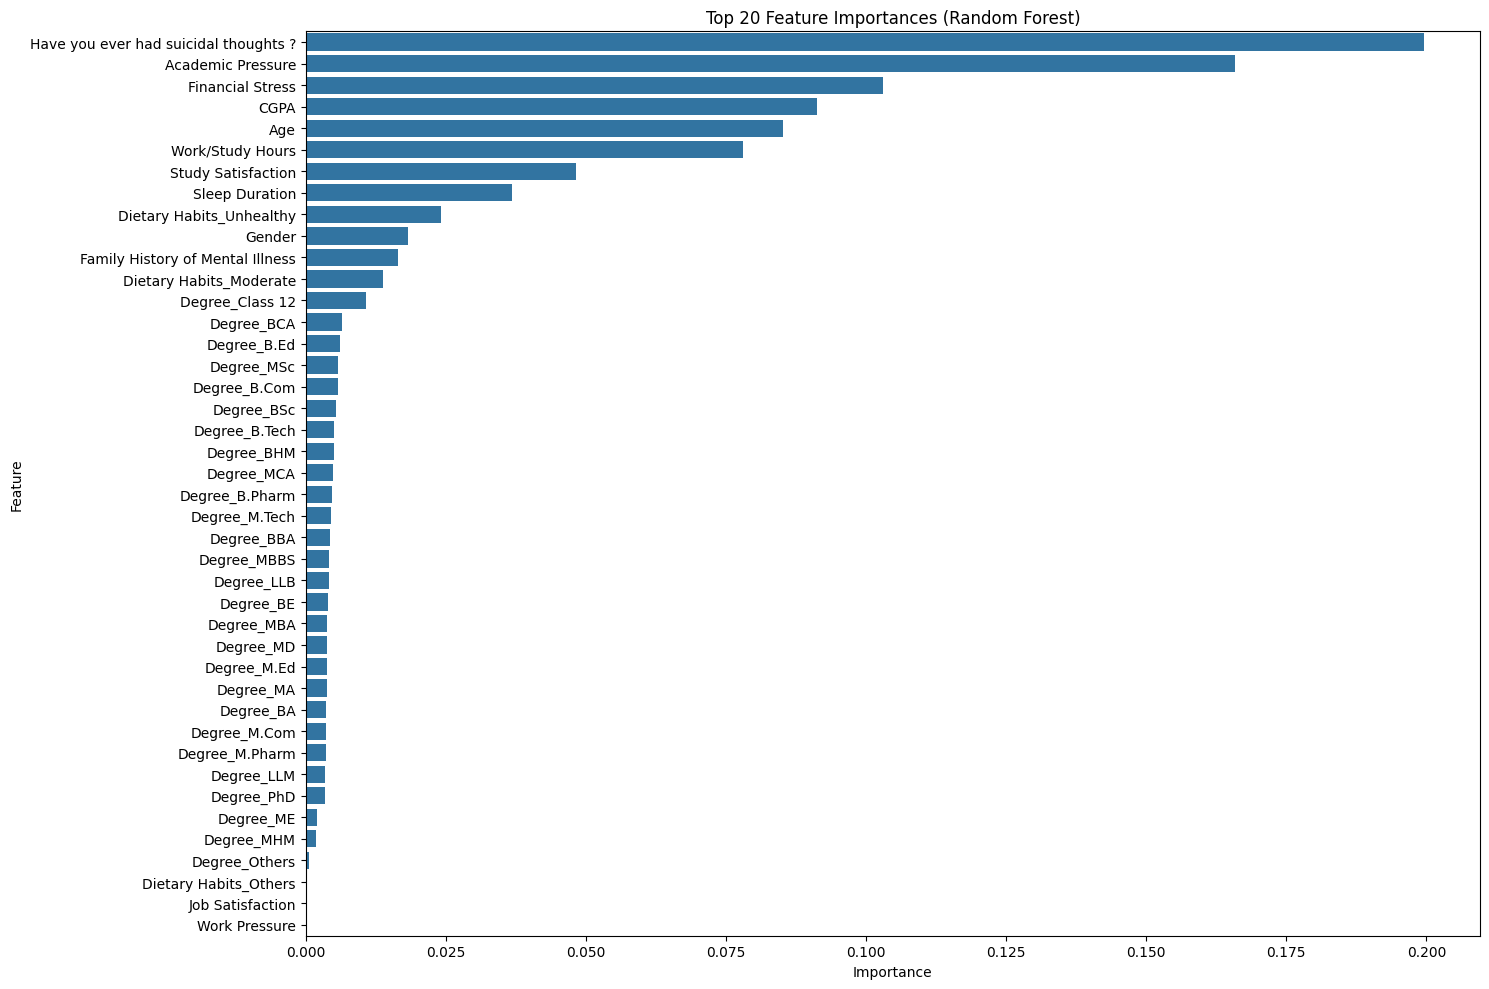

In [62]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train)

# Lấy tầm quan trọng của các đặc trưng
importances = rf.feature_importances_
feature_names = X_train_encoded.columns

# Sắp xếp và hiển thị các đặc trưng quan trọng nhất
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Vẽ biểu đồ trực quan hóa tầm quan trọng
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

Top 10 đặc trưng quan trọng nhất theo Logistic Regression:
                                  Feature      Coef   AbsCoef
0                                     Age -4.664928  4.664928
1                       Academic Pressure  4.140554  4.140554
40  Have you ever had suicidal thoughts ?  2.508683  2.508683
8                        Financial Stress  2.192075  2.192075
7                        Work/Study Hours  1.429057  1.429057
4                      Study Satisfaction -1.185844  1.185844
12               Dietary Habits_Unhealthy  1.078952  1.078952
6                          Sleep Duration -0.529477  0.529477
10                Dietary Habits_Moderate  0.494236  0.494236
3                                    CGPA  0.471286  0.471286
11                  Dietary Habits_Others  0.357711  0.357711
37                             Degree_MSc -0.352751  0.352751
35                              Degree_ME -0.351730  0.351730
13                           Degree_B.Com -0.300605  0.300605
17         

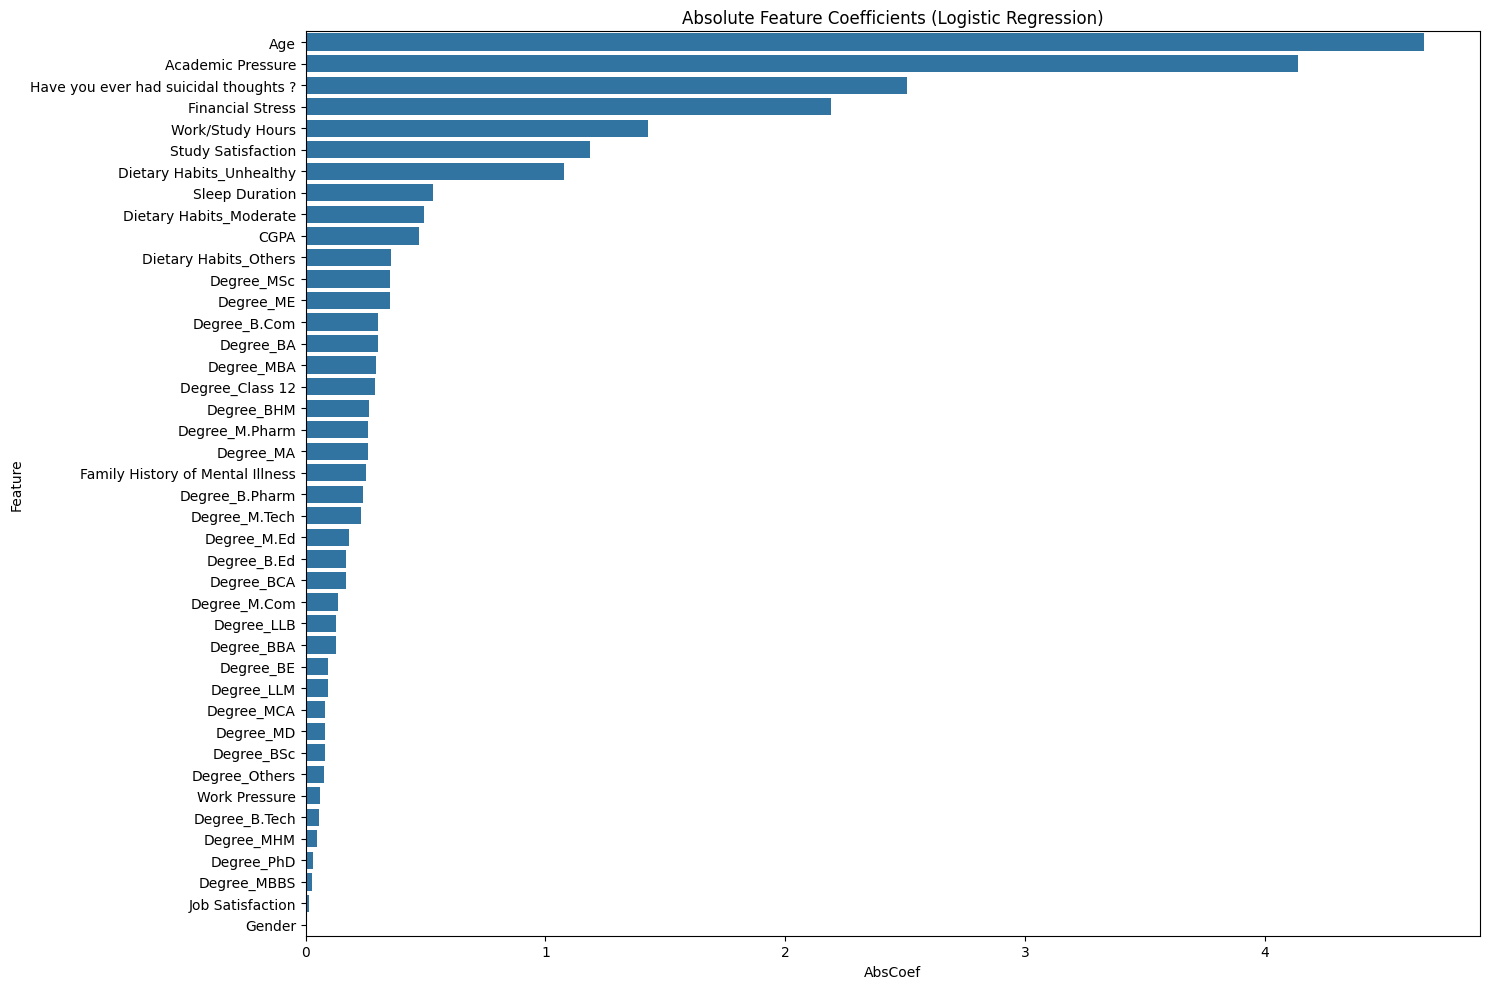

In [63]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
coefs = log_reg.coef_[0]
feature_names = X_train_encoded.columns

# Tạo DataFrame để xem độ quan trọng
coef_df = pd.DataFrame({'Feature': feature_names, 'Coef': coefs})
coef_df['AbsCoef'] = coef_df['Coef'].abs()
coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)

print("Top 10 đặc trưng quan trọng nhất theo Logistic Regression:")
print(coef_df)

# Vẽ biểu đồ trực quan hóa hệ số
plt.figure(figsize=(15, 10))
sns.barplot(x='AbsCoef', y='Feature', data=coef_df)
plt.title('Absolute Feature Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()

Top 10 đặc trưng quan trọng nhất theo Permutation Importance:
                                  Feature  Importance       Std
40  Have you ever had suicidal thoughts ?    0.109832  0.002783
1                       Academic Pressure    0.078354  0.001275
8                        Financial Stress    0.036676  0.001033
0                                     Age    0.017237  0.001545
12               Dietary Habits_Unhealthy    0.012275  0.001084
7                        Work/Study Hours    0.008639  0.000925
4                      Study Satisfaction    0.005382  0.001140
10                Dietary Habits_Moderate    0.003446  0.000697
6                          Sleep Duration    0.000840  0.000505
17                              Degree_BA    0.000502  0.000174
23                        Degree_Class 12    0.000492  0.000607
31                             Degree_MBA    0.000476  0.000188
3                                    CGPA    0.000384  0.000467
18                             Degree_BBA 

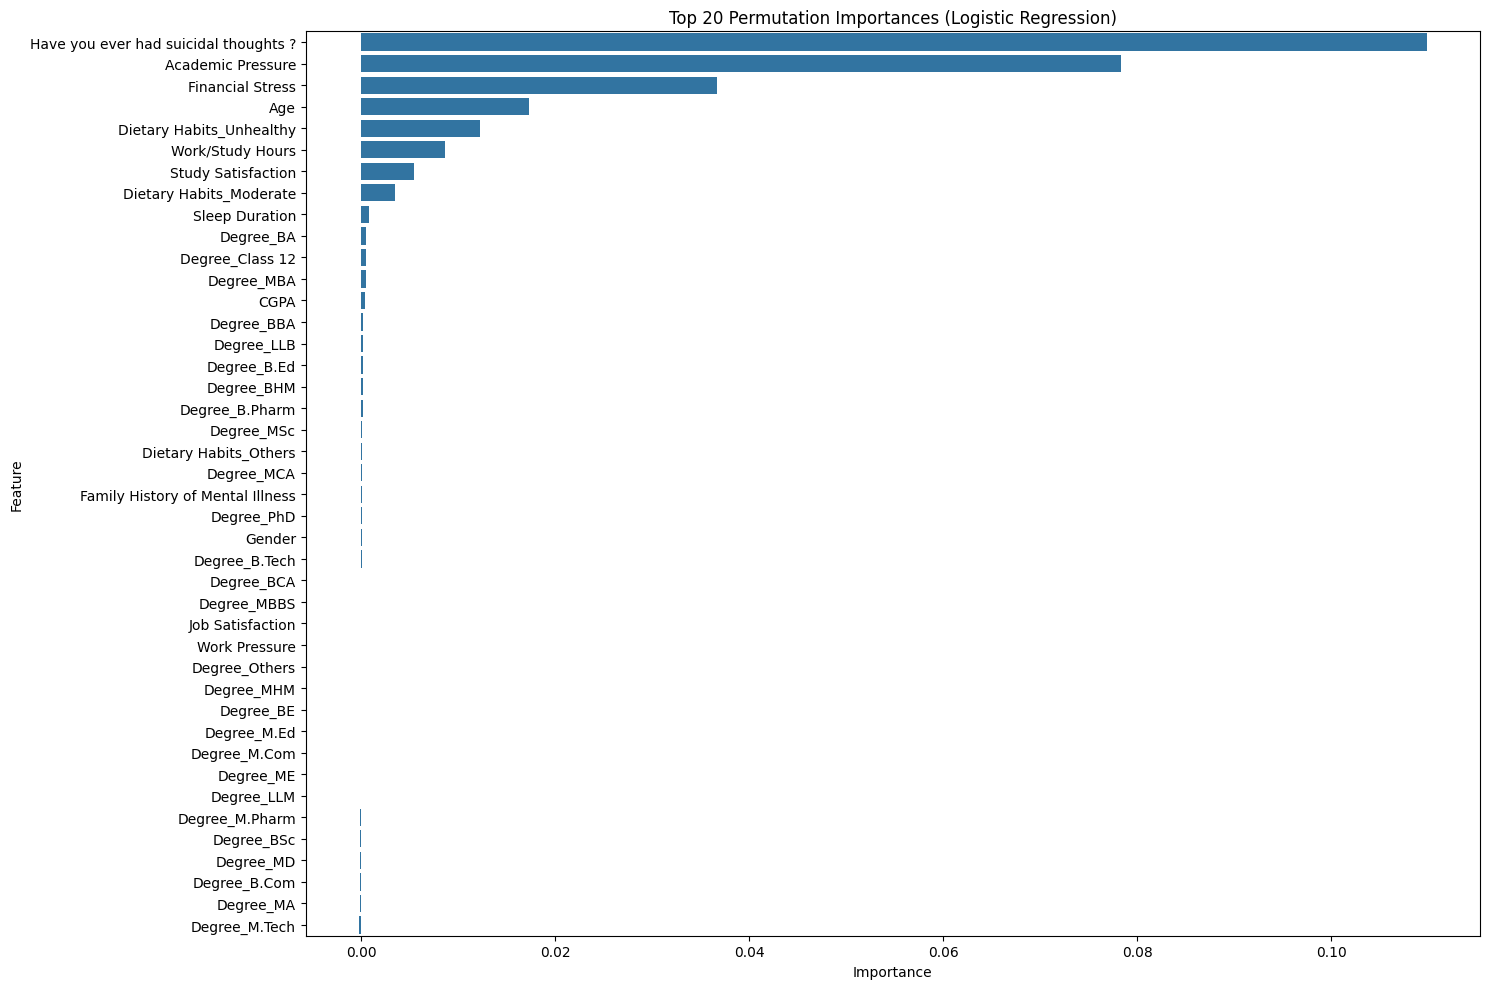

In [64]:
from sklearn.inspection import permutation_importance

# Đã huấn luyện log_reg hoặc rf rồi
result = permutation_importance(log_reg, X_train_scaled, y_train, n_repeats=10)

perm_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

print("Top 10 đặc trưng quan trọng nhất theo Permutation Importance:")
print(perm_importance_df)

plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Top 20 Permutation Importances (Logistic Regression)')
plt.tight_layout()
plt.show()